# Air bnb Kaggle HomeWork

In [86]:
# import package and libralies
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import KFold
from scipy.stats import spearmanr

In [87]:
# データ読み込み
df_train = pd.read_csv("C:/Users/kashiwabara_a/Desktop/text books/20180310_machine-learning-project-master/HW/train_users.csv")
df_test = pd.read_csv("C:/Users/kashiwabara_a/Desktop/text books/20180310_machine-learning-project-master/HW/test_users.csv")
df_train.shape, df_test.shape

((213451, 16), (62096, 15))

In [88]:
# テストデータに"country_destination"カラムを追加し、NAで埋める
df_test["country_destination"] = np.nan
# union train and test
df_whole= pd.concat([df_train, df_test], axis=0)

# 欠測値処理

In [89]:
# ageの欠測を平均値で補完
df_whole.age=df_whole.age.fillna(df_whole.age.mean())

In [90]:
# 各特徴量について加工をしていく

# date_account_createdについて、年月日に分割する
df_whole["Year_account_created"]=df_whole['date_account_created'].apply(lambda x:x[:4])
df_whole["Month_account_created"]=df_whole['date_account_created'].apply(lambda x:int(x[5:7]))
df_whole["Day_account_created"]=df_whole['date_account_created'].apply(lambda x:int(x[8:]))

# timestamp_first_activeについて、年月日に分割する
df_whole.timestamp_first_active = df_whole.timestamp_first_active.apply(str)
df_whole["Year_first_active"]=df_whole['timestamp_first_active'].apply(lambda x:x[:4])
df_whole["Month_first_active"]=df_whole['timestamp_first_active'].apply(lambda x:int(x[4:6]))
df_whole["Day_first_active"]=df_whole['timestamp_first_active'].apply(lambda x:int(x[6:8]))
df_whole["Time_first_active"]=df_whole['timestamp_first_active'].apply(lambda x:int(x[8:10]))

In [91]:
target_col = ['age', "Year_account_created", "Month_account_created", "Day_account_created", "Year_first_active",
             "Month_first_active", "Day_first_active", "Time_first_active"]

In [92]:
print(type(df_whole["Year_first_active"]))
df_whole["Year_first_active"] = df_whole["Year_first_active"].astype('int')
print(type(df_whole["Year_first_active"]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [84]:

cutoff_r = 0.5
new_added_col = []
for i in range(0, len(target_col)-1):
    print(target_col[i])
    for j in range(i+1, len(target_col)):
        first_col_name = target_col[i]
        second_col_name = target_col[j]
        df_whole[first_col_name] = df_whole[first_col_name].astype('int')
        df_whole[second_col_name] = df_whole[second_col_name].astype('int')
        r = spearmanr(df_whole[first_col_name], df_whole[second_col_name]).correlation
        if abs(r) > cutoff_r:
            new_colname = first_col_name + "_div_" + second_col_name
            df_whole[new_colname] = df_whole[first_col_name] / (df_whole[second_col_name] + 0.01)
            new_added_col.append(new_colname)

age
Year_account_created
Month_account_created
Day_account_created
Year_first_active
Month_first_active
Day_first_active


In [85]:
df_whole.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,Year_account_created,Month_account_created,Day_account_created,Year_first_active,Month_first_active,Day_first_active,Time_first_active,Year_account_created_div_Year_first_active,Month_account_created_div_Month_first_active,Day_account_created_div_Day_first_active
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,47,facebook,0,en,direct,...,2010,6,28,2009,3,19,4,1.000493,1.993355,1.472909
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38,facebook,0,en,seo,...,2011,5,25,2009,5,23,17,1.000991,0.998004,1.086484
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56,basic,3,en,direct,...,2010,9,28,2009,6,9,23,1.000493,1.497504,3.107658
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42,facebook,0,en,direct,...,2011,12,5,2009,10,31,6,1.000991,1.198801,0.161238
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41,basic,0,en,direct,...,2010,9,14,2009,12,8,6,1.000493,0.749376,1.747815


In [10]:
df_whole.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         186639
gender                          0
age                             0
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6085
signup_app                      0
first_device_type               0
first_browser                   0
country_destination         62096
Year_account_created            0
Month_account_created           0
Day_account_created             0
Year_first_active               0
Month_first_active              0
Day_first_active                0
Time_first_active               0
dtype: int64

# クラスラベルのエンコーディング

In [9]:
df_whole_map = df_whole
# first_affiliate_trackedのNaNを"untracked"で埋める
df_whole_map["first_affiliate_tracked"] = df_whole_map["first_affiliate_tracked"].fillna('untracked')
#df_whole["first_affiliate_tracked"].isnull

In [10]:
import numpy as np
class_mapping_gender = {label:idx for idx, label in enumerate(np.unique(df_whole_map["gender"]))}
class_mapping_singmethod = {label:idx for idx, label in enumerate(np.unique(df_whole_map["signup_method"]))}
class_mapping_language = {label:idx for idx, label in enumerate(np.unique(df_whole_map["language"]))}
class_mapping_afchanel = {label:idx for idx, label in enumerate(np.unique(df_whole_map["affiliate_channel"]))}
class_mapping_afprovid = {label:idx for idx, label in enumerate(np.unique(df_whole_map["affiliate_provider"]))}
class_mapping_fstaftrack = {label:idx for idx, label in enumerate(np.unique(df_whole_map["first_affiliate_tracked"]))}
class_mapping_signupApp = {label:idx for idx, label in enumerate(np.unique(df_whole_map["signup_app"]))}
class_mapping_fstdevTyp = {label:idx for idx, label in enumerate(np.unique(df_whole_map["first_device_type"]))}
class_mapping_fstbrows = {label:idx for idx, label in enumerate(np.unique(df_whole_map["first_browser"]))}

In [11]:
# マッピングディクショナリを使ってクラスラベルを整数に変換

df_whole_map["gender"] = df_whole["gender"].map(class_mapping_gender)
df_whole_map["signup_method"] = df_whole["signup_method"].map(class_mapping_singmethod)
df_whole_map["language"] = df_whole["language"].map(class_mapping_language)
df_whole_map["affiliate_channel"] = df_whole["affiliate_channel"].map(class_mapping_afchanel)
df_whole_map["affiliate_provider"] = df_whole["affiliate_provider"].map(class_mapping_afprovid)
df_whole_map["first_affiliate_tracked"] = df_whole["first_affiliate_tracked"].map(class_mapping_fstaftrack)
df_whole_map["signup_app"] = df_whole["signup_app"].map(class_mapping_signupApp)
df_whole_map["first_device_type"] = df_whole["first_device_type"].map(class_mapping_fstdevTyp)
df_whole_map["first_browser"] = df_whole["first_browser"].map(class_mapping_fstbrows)

df_whole_map.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,first_device_type,first_browser,country_destination,Year_account_created,Month_account_created,Day_account_created,Year_first_active,Month_first_active,Day_first_active,Time_first_active
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,0,47.14531,1,0,6,2,...,3,8,NDF,2010,6,28,2009,3,19,4
1,820tgsjxq7,2011-05-25,20090523174809,NaN,2,38.00000,1,0,6,7,...,3,8,NDF,2011,5,25,2009,5,23,17
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,1,56.00000,0,3,6,2,...,6,22,US,2010,9,28,2009,6,9,23
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,1,42.00000,1,0,6,2,...,3,17,other,2011,12,5,2009,10,31,6
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,0,41.00000,0,0,6,2,...,3,8,US,2010,9,14,2009,12,8,6


In [93]:
# カテゴリー変数を0/1に置換
ary_category_columns=["gender","signup_method","language","affiliate_channel","affiliate_provider",
                  "first_affiliate_tracked","signup_app","first_device_type","first_browser"]
df_whole_catego = pd.get_dummies(df_whole, columns=ary_category_columns, drop_first=True)

In [ ]:
#【マッピング版】データをtrainとtestに再分割
df_train_map=df_whole_map[df_whole_map.timestamp_first_active<="20140630235824"]
df_test_map=df_whole_map[df_whole_map.timestamp_first_active>"20140630235824"]
test_id_map=df_test_map['id']
test_id_map.head()

# 予測に用いるデータの作成
# 必要のないカラムを削除
X_train_map=df_train_map.drop(["id","date_account_created","timestamp_first_active",
                    "date_first_booking","country_destination"], axis=1)
#被説明変数のカラムをY_trainに代入
Y_train_map=df_train_map.country_destination
Y_train_map.head()

# テストデータの作成
X_test_map = df_test_map.drop(["id","date_account_created","timestamp_first_active",
                    "date_first_booking","country_destination"], axis=1)

df_train_map.shape

In [94]:
#【カテゴリカル変換】データをtrainとtestに再分割
df_train_aft=df_whole_catego[df_whole_catego.timestamp_first_active<="20140630235824"]
df_test_aft=df_whole_catego[df_whole_catego.timestamp_first_active>"20140630235824"]
test_id=df_test['id']
test_id.head()

0    5uwns89zht
1    jtl0dijy2j
2    xx0ulgorjt
3    6c6puo6ix0
4    czqhjk3yfe
Name: id, dtype: object

In [95]:
# 予測に用いるデータの作成
# 必要のないカラムを削除
X_train_org=df_train_aft.drop(["id","date_account_created","timestamp_first_active",
                    "date_first_booking","country_destination"], axis=1)
#被説明変数のカラムをY_trainに代入
Y_train=df_train_aft.country_destination
X_train_org.shape

(213451, 135)

In [96]:
# テストデータの作成
X_test_org = df_test_aft.drop(["id","date_account_created","timestamp_first_active",
                    "date_first_booking","country_destination"], axis=1)

# 順序特徴量のマッピング

In [97]:
# Countryと整数を対応させるディクショナリを生成
country_unique=list(set(Y_train))
country_dict={country_unique[i]:i for i in range(len(country_unique))}

In [98]:
Y_train_mapCol=Y_train.map(country_dict)
Y_train_mapCol.shape

(213451,)

# SBSアルゴリズムを実装

In [31]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

class SBS():
    """
    逐次後退選択(sequential backward selection)を実行するクラス
    """
    
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                test_size=0.25, random_state=1):
        self.scoring = scoring               # 特徴量を評価する指標
        self.estimator = clone(estimator)    # 推定器
        self.k_features = k_features         # 選択する特徴量の個数
        self.test_size = test_size           # テストデータの割合
        self.random_state = random_state     # 乱数種を固定するrandom_state
        
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                            random_state=self.random_state)
            # 全ての特徴量の個数、列インデックス
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        # すべての特徴量を用いてスコアを算出
        score = self._calc_score(X_train, y_train,
                                 X_test, y_test, self.indices_)
            
        # スコアを格納
        self.scores_ = [score]
        # 指定した特徴量の個数になるまで処理を反復
        while dim > self.k_features:
            # 空のリストの生成（スコア、列インデックス）
            scores = []
            subsets = []
                
            # 特徴量の部分集合を表す列インデックスの組み合わせごとに処理を反復
            for p in combinations(self.indices_, r=dim - 1):
                # スコアを算出して格納
                score = self._calc_score(X_train, y_train, X_test, y_test, p)
                scores.append(score)
                # 特徴量の部分集合を表す列インデックスのリストを格納
                subsets.append(p)
                    
            # 最良のスコアのインデックスを抽出
            best = np.argmax(scores)
            # 最良のスコアとなる列インデックスを抽出して格納
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            # 特徴量の個数を1つだけ減らして次のステップへ
            dim -= 1
                
            # スコアを格納
            self.scores_.append(scores[best])
                
        # 最後に格納したスコア
        self.k_score_ = self.scores_[-1]
            
        return self
        
    def transform(self, X):
        # 抽出した特徴量を返す
        X[:, self.indices_]
        
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        # 指定された列番号indicesの特徴量を抽出してモデルを適合
        self.estimator.fit(X_train[:, indices], y_train)
        # テストデータを用いてクラスラベルを予測
        y_pred = self.estimator.predict(X_test[:, indices])
        # 真のクラスラベルと予測値を用いてスコアを算出
        score = self.scoring(y_test, y_pred)
        return score

In [99]:
#NumPy Arrayにしておく
X_try_ar = np.array(X_train)
Y_train_map_ar = np.array(y_train)

MemoryError: 

In [101]:
X_try_ar.shape

(64827, 135)

In [102]:
# うまくまわらなかった・・・。
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
# K近傍法分類器のインスタンスを生成（近傍点数=5)
rfc = RandomForestClassifier(n_jobs=-1)
knn = KNeighborsClassifier(n_neighbors=5)
# 逐次後退選択のインスタンスを生成
sbs = SBS(knn, k_features =1)
# 逐次後退選択を実行
sbs.fit(X_try_ar, Y_train_map_ar)

KeyboardInterrupt: 

In [97]:
y_train.shape

(64827,)

In [92]:
X_try_ar.shape

(64035, 50)

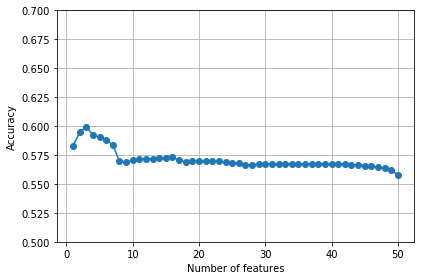

In [40]:
import matplotlib.pyplot as plt
# 特徴量の個数のリスト(13, 12, ....., )
k_feat = [len(k) for k in sbs.subsets_]

# 横軸を特徴量の個数、縦軸をスコアとした折れ線のプロット
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.5, 0.7])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

In [74]:
k3=list(sbs.subsets_[47])
print(X_train_org.columns[0:][k3])

k4=list(sbs.subsets_[46])
print(X_train_org.columns[0:][k4])

k5=list(sbs.subsets_[45])
print(X_train_org.columns[0:][k5])

Index(['Month_account_created', 'gender_MALE', 'language_fr'], dtype='object')
Index(['Month_account_created', 'gender_MALE', 'signup_method_facebook',
       'language_fr'],
      dtype='object')
Index(['Month_account_created', 'gender_FEMALE', 'gender_MALE',
       'signup_method_facebook', 'language_fr'],
      dtype='object')


# ランダムフォレストで特徴量の重要度にアクセスする

In [100]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train_org, Y_train_mapCol,
                                                   test_size=0.8, random_state=0, stratify=Y_train_mapCol)

In [101]:
# データセットの特徴量の名称
feat_labels = X_train.columns[:]

# ランダムフォレストオブジェクトの生成(決定木の個数=500)
forest = RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=1)

In [102]:
# モデルを適合
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [103]:
# 特徴量の重要度を抽出
importances = forest.feature_importances_

# 重要度の降順で特徴量のインデックスを抽出
indices = np.argsort(importances)[::-1]

# 重要度の降順で特徴量の名称、重要度を表示
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" %
          (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))


In [106]:
from sklearn.feature_selection import SelectFromModel

# 特徴選択オブジェクトを生成（重要度のしきい値を0.01に設定）
sfm = SelectFromModel(forest, threshold=0.0011, prefit=True)

# 特徴量を抽出
X_selected = sfm.transform(X_train)


select_col = []
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" %
          (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))    
    select_col.append(feat_labels[indices[f]])

 1) Time_first_active              0.159551
 2) Day_account_created            0.135095
 3) Day_first_active               0.133598
 4) age                            0.129037
 5) Month_first_active             0.078184
 6) Month_account_created          0.078016
 7) Year_account_created           0.022565
 8) Year_first_active              0.022456
 9) first_affiliate_tracked_untracked 0.021748
10) signup_method_facebook         0.016116
11) signup_flow                    0.015358
12) gender_FEMALE                  0.013392
13) first_browser_Chrome           0.011565
14) first_browser_Firefox          0.011559
15) gender_MALE                    0.011118
16) first_affiliate_tracked_omg    0.009936
17) first_device_type_Windows Desktop 0.009889
18) first_device_type_Mac Desktop  0.009127
19) first_browser_Safari           0.008756
20) first_browser_IE               0.006660
21) affiliate_channel_sem-brand    0.005551
22) first_browser_Mobile Safari    0.005272
23) affiliate_provider_goo

In [107]:
select_col

['Time_first_active',
 'Day_account_created',
 'Day_first_active',
 'age',
 'Month_first_active',
 'Month_account_created',
 'Year_account_created',
 'Year_first_active',
 'first_affiliate_tracked_untracked',
 'signup_method_facebook',
 'signup_flow',
 'gender_FEMALE',
 'first_browser_Chrome',
 'first_browser_Firefox',
 'gender_MALE',
 'first_affiliate_tracked_omg',
 'first_device_type_Windows Desktop',
 'first_device_type_Mac Desktop',
 'first_browser_Safari',
 'first_browser_IE',
 'affiliate_channel_sem-brand',
 'first_browser_Mobile Safari',
 'affiliate_provider_google',
 'affiliate_channel_sem-non-brand',
 'affiliate_provider_direct',
 'affiliate_channel_direct',
 'first_device_type_iPad',
 'first_affiliate_tracked_tracked-other',
 'affiliate_channel_seo',
 'first_device_type_iPhone',
 'language_en',
 'first_device_type_Other/Unknown',
 'affiliate_provider_other',
 'affiliate_channel_content',
 'first_affiliate_tracked_product',
 'signup_app_Web',
 'signup_app_iOS',
 'affiliate_pro

In [108]:
select_col = ['Time_first_active',
 'Day_account_created',
 'Day_first_active',
 'age',
 'Month_first_active',
 'Month_account_created',
 'Year_account_created',
 'Year_first_active',
 'first_affiliate_tracked_untracked',
 'signup_method_facebook',
 'signup_flow',
 'gender_FEMALE',
 'first_browser_Chrome',
 'first_browser_Firefox',
 'gender_MALE']


In [56]:
country_idx = sorted(list(country_dict.values()))
country_idx = np.array(country_idx)

def get_dcg(y_pred, y_true):
    dcg5 = (2**(y_pred==y_true).astype(np.float) -1) /np.log2(np.arange(1,len(y_pred)+1)+1)
    return sum(dcg5)

def get_mean_dcg_score(proba_array, y_true):
    dcg_scores = []
    for i in range(len(proba_array)):
        each = proba_array[i]
        top5_idx = country_idx[np.argsort(each)][::-1][:5]  #Top5の国のインデックスを取得
        tmp_dcg = get_dcg(y_pred=top5_idx, y_true=y_true[i])  #DCGのスコアを取得
        dcg_scores.append(tmp_dcg)  #全てのレコードのDCGのスコアを保管
    return np.mean(dcg_scores)

In [42]:
import gc
import numpy as np

a = np.zeros((100,100))
del a
gc.collect()

43

# クロスバリデーションを実施

In [44]:
# Numpy Array にしておく
X_train_ar = np.array(X_train_org[select_col])
Y_train_map_ar = np.array(Y_train_mapCol)
X_test_ar = np.array(X_test_org[select_col])

In [57]:
# クロスバリデーションの実施
# KFold
# n_foldsで指定した数値でデータを分割。n_folds=5とした場合、5分割
# してそのうちの１つをテストデータとし、5通りパターンを生成する。
k_fold=KFold(Y_train_map_ar.shape[0],n_folds=5,shuffle=True)
score_list=[]

clf = RandomForestClassifier()

for train_index, test_index in k_fold:
    X1,X2 = X_train_ar[train_index], X_train_ar[test_index]
    Y1,Y2 = Y_train_map_ar[train_index], Y_train_map_ar[test_index]
    clf.fit(X1, Y1)
    ypred = clf.predict_proba(X2)
    ndcg_score = get_mean_dcg_score(ypred, Y2)
    score_list.append(ndcg_score)

In [58]:
print("Mean: ", np.mean(score_list))
print("SD: ", np.std(score_list))

Mean:  0.770316490618
SD:  0.00158773821296


# 最終モデルの作成

In [47]:
import gc
import numpy as np

a = np.zeros((100,100))
del a
gc.collect()

168

In [27]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = \
 train_test_split(X_train_ar, Y_train_map_ar, test_size=0.7, random_state=1234)

In [59]:
clf = RandomForestClassifier(n_jobs=-1, random_state=1)
clf.fit(X_train_ar, Y_train_map_ar)
ypred_proba = clf.predict_proba(X_test_ar)

In [49]:
y_true = np.array(y_train)
y_pred = np.array(y_test)
    
get_dcg(y_pred=y_pred, y_true=y_true)

C:\Users\kashiwabara_a\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """


AttributeError: 'bool' object has no attribute 'astype'

# Submission fileを書き出す

In [60]:
# country_dictのKeyとValueを入れ替えた形で辞書を作る
country_dict_reverse={v:k for k,v in country_dict.items()}

In [61]:
#Submission用データを作成
submission_data = []
for user_id, proba_each in zip(test_id, ypred_proba):
    top5_idx = country_idx[np.argsort(proba_each)][::-1][:5]  #Top5の国のインデックスを取得
    top5_country = [country_dict_reverse[idx] for idx in top5_idx]
    for each_country in top5_country:
        tmp_ = [user_id, each_country]
        submission_data.append(tmp_)

In [62]:
#データフレームに変換
submission_df = pd.DataFrame(submission_data, columns=['id', 'country'])

In [63]:
print(submission_df.shape)
submission_df.head(10)

(310480, 2)


,id,country
0,5uwns89zht,NDF
1,5uwns89zht,other
2,5uwns89zht,US
3,5uwns89zht,AU
4,5uwns89zht,CA
5,jtl0dijy2j,NDF
6,jtl0dijy2j,other
7,jtl0dijy2j,US
8,jtl0dijy2j,AU
9,jtl0dijy2j,CA


In [64]:
#csvファイルに書き出す
submission_df.to_csv("C:/Users/kashiwabara_a/Desktop/text books/20180310_machine-learning-project-master/HW/Airbnb_benchmark_submission5.csv",index=False)